# Navigation - Test run 100 times

---

With this notebook, you will run the game 100 times. I assume that you already have installed all dependencies and have downloaded the simulator. If you have not, please do that. I was running in a conda environment. The step I took were:


```
conda create --name unity python=3.6
conda activate unity

pip install unityagents
pip install mlagents
pip install gym
pip install h5py
pip install Pillow
```

Download the environment from one of the links below.  You need to select the environment that matches your operating system (assuming you have a 64 bit system):
- Linux (64 bit): [from here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Linux.zip)
- Mac OSX: [from here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana.app.zip)
- Windows (64-bit): [from here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P1/Banana/Banana_Windows_x86_64.zip)

### 1. Setting the paths

Relative location of the simulator should be set. Note that you should have right format depending on the platform you are using. If you have a 64 bit machine with similar directory structure as I, then for 64 bit Linux and Windows and mac will be something like this:

* For 64 bit windows: ```"../Banana_Windows_x86_64/Banana.exe"```

* For 64 bit Linux: ```"../Banana_Linux/Banana.x86_64"```

* For Mac: ```"../Banana.app"```

Now, set the path to the simulator and the data:

In [1]:
data_file_path ="dueling_checkpoint_average_15.pth"
simulator_path = "Banana_Linux/Banana.x86_64"

### 2. Import necessary packages and the agent

In [2]:
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from unityagents import UnityEnvironment
from dueling_dqn_agent import Agent

### 3. Initialize and run the test 100 times

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 1	Score: 14.00
Episode 2	Score: 11.00
Episode 3	Score: 18.00
Episode 4	Score: 15.00
Episode 5	Score: 2.00
Episode 6	Score: 16.00
Episode 7	Score: 14.00
Episode 8	Score: 16.00
Episode 9	Score: 13.00
Episode 10	Score: 16.00
Episode 11	Score: 11.00
Episode 12	Score: 14.00
Episode 13	Score: 19.00
Episode 14	Score: 19.00
Episode 15	Score: 16.00
Episode 16	Score: 13.00
Episode 17	Score: 14.00
Episode 18	Score: 8.00
Episode 19	Score: 15.00
Episode 20	Score: 15.00
Episode 21	Score: 18.00
Episode 22	Score: 21.00
Episode 23	Score: 18.00
Episode 24	Score: 18.00
Episode 25	Score: 15.00
Episode 26	Score: 15.00
Episode 27	Score: 23.00
Episode 28	Score: 18.00
Episode 29	Score: 16.00
Episode 30	Score: 15.00
Episode 31	Score: 5.00
Episode 32	Score: 9.00
Episode 33	Score: 19.00
Episode 34	Score: 23.00
Episode 35	Score: 16.00
Episode 36	Score: 0.00
Episode 37	Score: 17.00
Episode 38	Score: 16.00
Episode 39	Score: 20.00
Episode 40	Score: 0.00
Episode 41	Score: 20.00
Episode 42	Score: 14.00
Episode

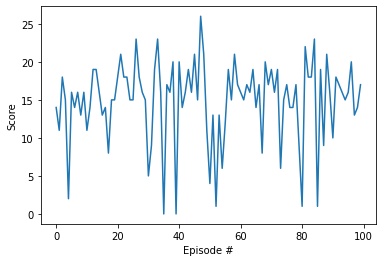

In [3]:
env = UnityEnvironment(file_name=simulator_path)

brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=False)[brain_name]
action_size = brain.vector_action_space_size
state = env_info.vector_observations[0]
state0 = state                                     # State in previous step


state_size = len(state)

agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load(data_file_path))


def dqn_test(n_episodes=100, max_t=1000):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): number of test episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores

    for i_episode in range(1, n_episodes+1):
        
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0                                          # initialize the score
        
        for t in range(max_t):       
            action = agent.act(state)                      # select an action
            env_info = env.step(action)[brain_name]        # send the action to the environment
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            state = env_info.vector_observations[0]        # get the next state  
            score += reward                                # update the score
            if done:                                       # exit loop if episode finished    
                break

        scores.append(score)              # save most recent score
        print('\rEpisode {}\tScore: {:.2f}'.format(i_episode, score))      
    return scores

scores = dqn_test(n_episodes=100)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
env.close()